In [4]:
#Importes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Mostra as linhas e colunas
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.528510,0.561473,-1.542214e-06,0.411844,0.520127,-0.017140,0.306423,0.372052,-0.025037,0.263505,...,0.540145,0.113665,-0.100813,0.530798,0.237967,-0.078293,0.537091,0.324225,-0.045945,A
1,0.530249,0.579395,-1.547941e-06,0.407179,0.522005,-0.017742,0.306752,0.363861,-0.023908,0.265760,...,0.571180,0.115267,-0.086183,0.563753,0.206230,-0.064372,0.569096,0.285017,-0.032911,A
2,0.561529,0.633447,-1.446836e-06,0.422279,0.561144,-0.037569,0.315302,0.376890,-0.050566,0.277395,...,0.627074,0.176405,-0.091994,0.619227,0.305458,-0.072068,0.619568,0.398487,-0.039260,A
3,0.565628,0.638648,-1.294094e-06,0.423811,0.570778,-0.044564,0.314068,0.384459,-0.058153,0.278709,...,0.638866,0.197162,-0.089725,0.626684,0.333803,-0.072164,0.617374,0.421557,-0.039407,A
4,0.570113,0.638713,-1.272186e-06,0.425240,0.558971,-0.043042,0.318798,0.376398,-0.056131,0.286413,...,0.647901,0.200896,-0.090592,0.633259,0.335336,-0.074060,0.620592,0.424192,-0.041932,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.665020,0.931948,5.582993e-07,0.582494,0.960193,-0.091928,0.546640,0.924462,-0.142403,0.606019,...,0.713436,0.696443,-0.175751,0.694683,0.788766,-0.191457,0.687416,0.871839,-0.196801,W
1995,0.654160,0.940836,9.187862e-07,0.575116,0.968971,-0.099120,0.536430,0.936418,-0.155728,0.595878,...,0.711628,0.704125,-0.178443,0.695230,0.775262,-0.181008,0.684774,0.838825,-0.177956,W
1996,0.650813,0.963600,7.850853e-07,0.572731,0.982260,-0.098797,0.532778,0.935264,-0.151031,0.598220,...,0.704552,0.704665,-0.161251,0.686810,0.785446,-0.166109,0.679923,0.856350,-0.163728,W
1997,0.624433,0.924774,6.437164e-07,0.558422,0.960502,-0.104285,0.529397,0.935401,-0.163825,0.583737,...,0.694751,0.696022,-0.180376,0.680124,0.770874,-0.186620,0.671972,0.842946,-0.186425,W


In [6]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.528510,0.561473,-1.542214e-06,0.411844,0.520127,-0.017140,0.306423,0.372052,-0.025037,0.263505,...,0.540145,0.113665,-0.100813,0.530798,0.237967,-0.078293,0.537091,0.324225,-0.045945,A
1,0.530249,0.579395,-1.547941e-06,0.407179,0.522005,-0.017742,0.306752,0.363861,-0.023908,0.265760,...,0.571180,0.115267,-0.086183,0.563753,0.206230,-0.064372,0.569096,0.285017,-0.032911,A
2,0.561529,0.633447,-1.446836e-06,0.422279,0.561144,-0.037569,0.315302,0.376890,-0.050566,0.277395,...,0.627074,0.176405,-0.091994,0.619227,0.305458,-0.072068,0.619568,0.398487,-0.039260,A
3,0.565628,0.638648,-1.294094e-06,0.423811,0.570778,-0.044564,0.314068,0.384459,-0.058153,0.278709,...,0.638866,0.197162,-0.089725,0.626684,0.333803,-0.072164,0.617374,0.421557,-0.039407,A
4,0.570113,0.638713,-1.272186e-06,0.425240,0.558971,-0.043042,0.318798,0.376398,-0.056131,0.286413,...,0.647901,0.200896,-0.090592,0.633259,0.335336,-0.074060,0.620592,0.424192,-0.041932,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.665020,0.931948,5.582993e-07,0.582494,0.960193,-0.091928,0.546640,0.924462,-0.142403,0.606019,...,0.713436,0.696443,-0.175751,0.694683,0.788766,-0.191457,0.687416,0.871839,-0.196801,W
1995,0.654160,0.940836,9.187862e-07,0.575116,0.968971,-0.099120,0.536430,0.936418,-0.155728,0.595878,...,0.711628,0.704125,-0.178443,0.695230,0.775262,-0.181008,0.684774,0.838825,-0.177956,W
1996,0.650813,0.963600,7.850853e-07,0.572731,0.982260,-0.098797,0.532778,0.935264,-0.151031,0.598220,...,0.704552,0.704665,-0.161251,0.686810,0.785446,-0.166109,0.679923,0.856350,-0.163728,W
1997,0.624433,0.924774,6.437164e-07,0.558422,0.960502,-0.104285,0.529397,0.935401,-0.163825,0.583737,...,0.694751,0.696022,-0.180376,0.680124,0.770874,-0.186620,0.671972,0.842946,-0.186425,W


In [7]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1999, 63)
Labels shape = (1999,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [9]:
y_pred = svm.predict(x_test)
y_pred, y_test

(array(['E', 'O', 'G', 'M', 'L', 'Q', 'Q', 'I', 'U', 'A', 'M', 'M', 'C',
        'B', 'L', 'L', 'E', 'W', 'F', 'G', 'W', 'M', 'M', 'S', 'M', 'S',
        'E', 'M', 'F', 'O', 'I', 'L', 'W', 'U', 'M', 'E', 'O', 'B', 'E',
        'M', 'A', 'O', 'P', 'A', 'M', 'F', 'D', 'C', 'S', 'U', 'S', 'Q',
        'A', 'F', 'C', 'M', 'E', 'Q', 'M', 'L', 'L', 'S', 'M', 'M', 'A',
        'I', 'M', 'G', 'F', 'D', 'C', 'M', 'V', 'M', 'D', 'T', 'B', 'B',
        'U', 'M', 'M', 'B', 'D', 'O', 'T', 'C', 'T', 'C', 'E', 'D', 'A',
        'I', 'B', 'R', 'S', 'T', 'W', 'A', 'V', 'C', 'S', 'F', 'F', 'M',
        'A', 'V', 'R', 'O', 'M', 'R', 'D', 'V', 'R', 'M', 'S', 'W', 'W',
        'A', 'M', 'A', 'T', 'A', 'M', 'B', 'W', 'V', 'L', 'V', 'M', 'R',
        'O', 'B', 'C', 'C', 'G', 'E', 'Q', 'M', 'I', 'M', 'M', 'T', 'V',
        'F', 'A', 'W', 'D', 'B', 'M', 'M', 'E', 'M', 'F', 'U', 'A', 'I',
        'C', 'L', 'O', 'O', 'M', 'M', 'R', 'W', 'M', 'M', 'V', 'V', 'G',
        'R', 'F', 'M', 'B', 'B', 'F', 'P', 'S', 'D'

In [10]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8525, 0.8525, 0.8525)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

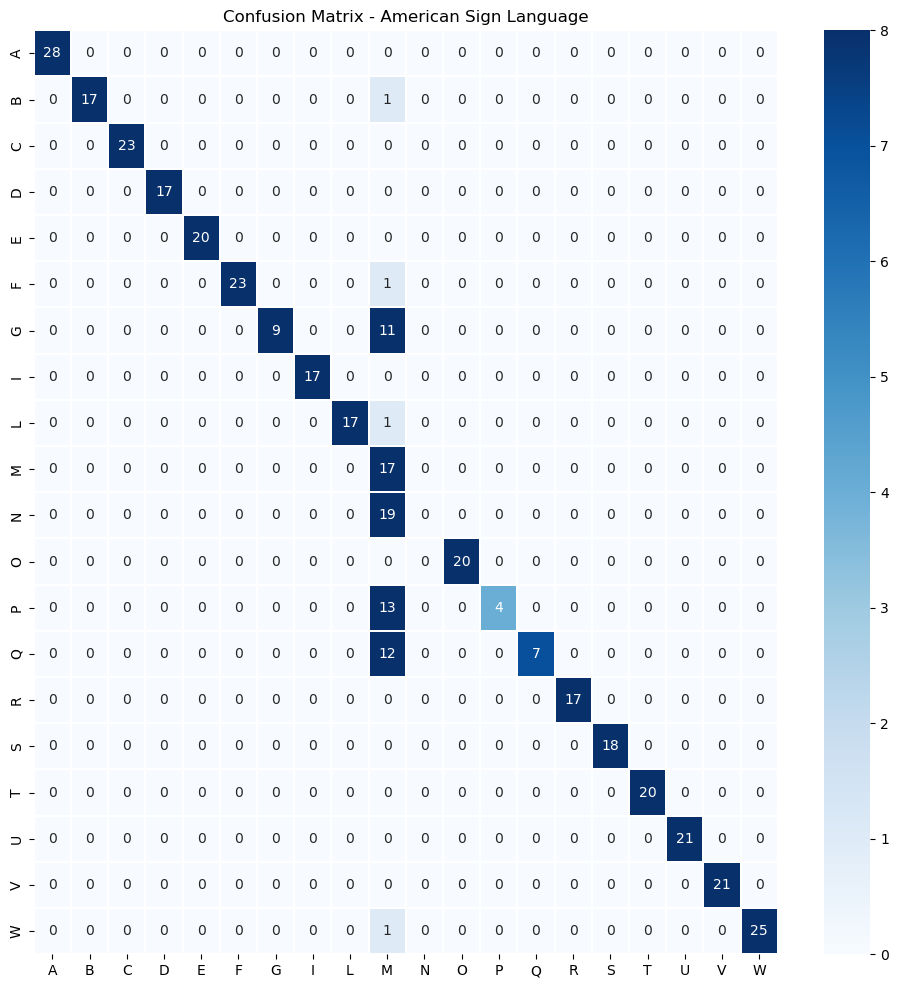

In [11]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [12]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)